# Latent Dirichlet Allocation

In this final assignment, you will implement LDA and try it out on a corpus. Be sure to start work on this assignment early, because running your code will take some time. A full run of my implementation took about four hours. Consider running your code on smaller subcorpora during debugging.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Data loading

Try your Gibbs sampler on the corpus of 2000 movie reviews from Pang & Lee (2004), available on Classroom. The first line of the file specifies the number of documents. Then each subsequent line is one document, with the tokens separated by whitespace. I generated the file on Classroom from the original movie reviews by tokenizing them and then removing punctuation and stopwords, so you get nicer topics.

In [2]:
%%capture
! pip install pyLDAvis
! pip install wget

In [1]:
FORCE_RETRAIN_MODEL = False
PATH_TO_TRAINED_MODEL = '20_topics_500_iters_full_vocab.json'

NUM_OF_TOPICS = 20
NUM_OF_ITERATIONS = 500
# -1 is default for saving only after full train
SAVE_EVERY_N_ITERATIONS = 100

SOURCE_DATA_FILENAME = 'movies-pp.txt' # 'movies-pp.txt', 'belapan_lda_be.txt', 'belapan_lda_ru.txt'
SOLUTION_FILENAME = 'solution.py'

In [2]:
import os
import wget

path_to_git_folder = 'https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/Computational_Linguistics/HW6_LDA'

if not os.path.isfile(SOLUTION_FILENAME):
    wget.download(f'{path_to_git_folder}{SOLUTION_FILENAME}')

if not os.path.isfile(SOURCE_DATA_FILENAME):
    wget.download(f'{path_to_git_folder}/data/{SOURCE_DATA_FILENAME}')

if FORCE_RETRAIN_MODEL is False and not os.path.isfile(PATH_TO_TRAINED_MODEL):
    wget.download(f'{path_to_git_folder}/models/{PATH_TO_TRAINED_MODEL}')

In [3]:
from solution import DataHelper
data_helper = DataHelper(SOURCE_DATA_FILENAME, NUM_OF_TOPICS)

print(data_helper.NUM_OF_DOCS, data_helper.VOCAB_SIZE, data_helper.CORPUS_SIZE)

/users/tsimafeip/pythonProject/venv_m1/lib/python3.8/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/users/tsimafeip/pythonProject/venv_m1/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/users/tsimafeip/pythonProject/venv_m1/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


2000 46517 698784


## Gibbs sampler

Implement a Gibbs sampler which resamples a topic for each word in the corpus according to the probability distribution in formula [5] of [Griffiths & Steyvers (2004)](https://www.pnas.org/content/101/suppl_1/5228). Initialize the topic assignments by choosing a topic uniformly at random for each token in the corpus. You can also refer to [Darling tutorial](https://u.cs.biu.ac.il/~89-680/darling-lda.pdf) for details of implementation.

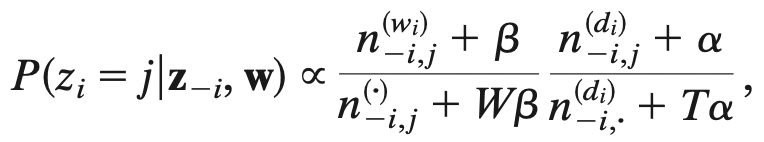

[34708, 34803, 34542, 35100, 35032, 34914, 34739, 35177, 34809, 34771, 34865, 35035, 34881, 35358, 34900, 35097, 35169, 34780, 34966, 35138]


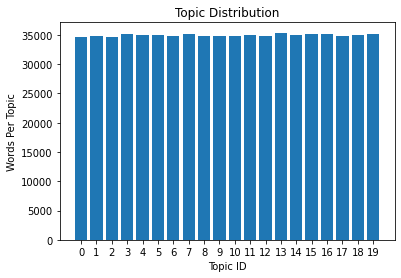

In [4]:
from solution import plot_topic_distribution

print(data_helper.topic_counter)
plot_topic_distribution(data_helper.topic_counter)

Algorithm
```
        run for NUM_OF_ITERATIONS (hyperparam)
            for each word_document pair in corpus
                get current topic
                decrease all respective counts:
                    - general count of this topic;
                    - count of this topic for specific word;
                    - count of this topic in document;
                run loop over topics count K
                    re-evaluate word_to_topic sampling probabilites
                choose new topic for the word based on weights obtained above
                increase all respective counts
```

Apply Gibbs sample to full corpus:

In [5]:
from solution import GibbsSampler

if FORCE_RETRAIN_MODEL:
    gibbs_sampler = GibbsSampler(data_helper)
    data_helper = gibbs_sampler.train(NUM_OF_ITERATIONS, iterations_to_save=SAVE_EVERY_N_ITERATIONS)
    path_to_trained_helper = data_helper.export_trained_helper()
else:
    data_helper = DataHelper.import_trained_helper(
        path_to_model_file=PATH_TO_TRAINED_MODEL,
        base_data_helper=data_helper,
    )
    data_helper.run_consistency_tests()

100%|██████████| 400/400 [2:15:47<00:00, 20.37s/it]  


I have experimented with 10 and 20 topic and also with vocab filtering. Vocab filtering included removing words that appearing in less than 10 documents (very rare and, possibly, not very characteristic/informative) and very common words appering in more than half of documents (words like 'film', 'movie' which appear in almost every review and, hence, too common to build specific topic on top of them).

Time of iteration:
1) Full vocab (~47k tokens), 20 topics: ~20sec
2) Filtered vocab (~8k tokens), 20 topics: ~15sec
3) Filtered vocab (~8k tokens), 10 topics: ~11.5sec

In [6]:
data_helper.print_top_words_for_all_topics()

Topic ID: 1
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'much']
Topic ID: 2
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'much']
Topic ID: 3
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'much']
Topic ID: 4
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'character']
Topic ID: 5
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'much']
Topic ID: 6
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'much']
Topic ID: 7
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'much']
Topic ID: 8
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'much']
Topic ID: 9
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'good', 'time', 'would', 'story', 'character']
Topic ID:

Even after filtering out very common words and 500 iterations I had almost the same top-10 topic wordlists. Hence, we need some advanced to analyse topic distinction. I have decided to use [pyLDAvis](!https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf) and set $\lambda$ (relevance metric parameter) to 0.2 to check unique words for each topic. Also, PCA plot helps to understand whether we learned some different topics or not.

Try out different numbers of topics and iterations and different values for the hyperparameters. You should get good results with 20 topics, 500 iterations over the corpus, α = 0.02, and β = 0.1. Print, for each topic, the most frequent words for that topic in the final sample, and discuss to which extent the topics actually represent thematically coherent semantic fields.

In [7]:
import pyLDAvis

movies_vis_data = data_helper.get_movies_vis_data()
pyLDAvis.display(movies_vis_data)

/users/tsimafeip/pythonProject/venv_m1/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/users/tsimafeip/pythonProject/venv_m1/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/users/tsimafeip/pythonProject/venv_m1/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/users/tsimafeip/pythonProject/venv_m1/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import r

## Extra credit

- Use Numpy to speed up the calculations;
- try your system on other corpora; 
- experiment with different strategies for initializing the topic assignments (e.g., give the same topic to all words of the same document);
- use a bit of supervised information (e.g., fix the topic assignments for specific words that you know should belong to that topic, and do not allow the sampler to change them).


Uncomment code below if you want to recreate Belarusian/Russian files with more/less documents.
Please be careful, since big (~110mb) source files will be downloaded here.

In [ ]:
# ! pip install gsutil

# raw_bel_filepath = "Corpus_Bel.txt_tok.txt_true.txt"
# raw_rus_filepath = "Corpus_Rus.txt_tok.txt_true.txt"

# if not os.path.isfile(raw_bel_filepath):
#     !gsutil -m cp -r "gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/$raw_bel_filepath" .
    
# if not os.path.isfile(raw_rus_filepath):
#     !gsutil -m cp -r "gs://mytranslator-298419-vcm/RuBeCorpus_BelapanNews/Separate Corpuses/FullCorpus/$raw_rus_filepath" .

# def convert_corpus_to_lda_format(source_filepath: str, lang: str, size_of_corpus: int = 20000) -> str:
#     target_file_name = f'belapan_lda_{lang}.txt'
#     with open(source_filepath, 'r') as input_f, open(target_file_name, 'w') as output_f:
#         output_f.write(f"{size_of_corpus}\n")
#         for i, line in enumerate(input_f):
#             if i == size_of_corpus:
#                 break
#             output_f.write(line)
    
#     return target_file_name

# lda_bel_file = convert_corpus_to_lda_format(raw_bel_filepath, lang='be')
# lda_ru_file = convert_corpus_to_lda_format(raw_rus_filepath, lang='ru')

# print(lda_bel_file, lda_ru_file)

In [ ]:
BEL_SOURCE_FILENAME = 'belapan_lda_be'
BEL_TRAINED_MODEL = '10_topics_100_iters_bel_model.json'

path_to_git_folder = 'https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/Computational_Linguistics/HW6_LDA'

if not os.path.isfile(BEL_SOURCE_FILENAME):
    wget.download(f'{path_to_git_folder}/data/{BEL_SOURCE_FILENAME}')

if not os.path.isfile(BEL_TRAINED_MODEL):
    wget.download(f'{path_to_git_folder}/models/{BEL_TRAINED_MODEL}')

In [ ]:
bel_data_helper = DataHelper.import_trained_helper(
    path_to_model_file=BEL_TRAINED_MODEL,
    path_to_sorce_data=BEL_SOURCE_FILENAME,
)
bel_data_helper.run_consistency_tests()

print(bel_data_helper.NUM_OF_DOCS, bel_data_helper.VOCAB_SIZE, bel_data_helper.CORPUS_SIZE)
bel_vis_data = bel_data_helper.get_lda_vis_data()
pyLDAvis.display(bel_vis_data)